In [4]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
asr = pd.read_csv('Dataset(Jan-25)\Amazon Sale Report.csv')
cwc = pd.read_csv('Dataset(Jan-25)\Cloud Warehouse Compersion Chart.csv')
expense = pd.read_csv('Dataset(Jan-25)\Expense IIGF.csv')
isr = pd.read_csv('Dataset(Jan-25)/International sale Report.csv')
may = pd.read_csv('Dataset(Jan-25)\May-2022.csv')
pl = pd.read_csv('Dataset(Jan-25)\P  L March 2021.csv')
sr = pd.read_csv('Dataset(Jan-25)\Sale Report.csv')

In [6]:
print(asr.shape)
print(cwc.shape)
print(expense.shape)
print(isr.shape)
print(may.shape)
print(pl.shape)
print(sr.shape)

(128975, 23)
(50, 4)
(17, 5)
(37432, 10)
(1330, 17)
(1330, 18)
(9271, 7)


PREPROCCESSING

Dropping Duplicates

In [7]:
asr.drop_duplicates()
cwc.drop_duplicates()
expense.drop_duplicates()
isr.drop_duplicates()
may.drop_duplicates()
pl.drop_duplicates()
sr.drop_duplicates()

,index,Product_SKU,Design_Number,Stock_Level,Product_Category,Product_Size,Product_Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...,...
9266,9266,NaN,NaN,NaN,NaN,NaN,NaN
9267,9267,NaN,NaN,NaN,NaN,NaN,NaN
9268,9268,NaN,NaN,NaN,NaN,NaN,NaN
9269,9269,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
asr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   128975 non-null  int64  
 1   Order_ID                128975 non-null  object 
 2   Order_Date              128975 non-null  object 
 3   Order_Status            128975 non-null  object 
 4   Fulfillment_Type        128975 non-null  object 
 5   Sales_Channel           128975 non-null  object 
 6   Shipping_Service_Level  128975 non-null  object 
 7   Product_Style           128975 non-null  object 
 8   Product_SKU             128975 non-null  object 
 9   Product_Category        128975 non-null  object 
 10  Product_Size            128975 non-null  object 
 11  Amazon_Standard_ID      128975 non-null  object 
 12  Courier_Status          122103 non-null  object 
 13  Quantity                128975 non-null  int64  
 14  Currency            

In [9]:
isr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37432 entries, 0 to 37431
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               37432 non-null  int64 
 1   Sale_Date           37431 non-null  object
 2   Sale_Month          37407 non-null  object
 3   Customer_Name       36392 non-null  object
 4   Product_Style       36392 non-null  object
 5   Product_SKU         34958 non-null  object
 6   Product_Size        36392 non-null  object
 7   Quantity_Purchased  36392 non-null  object
 8   Price_per_Unit      36392 non-null  object
 9   Gross_Amount        36392 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB


FINDING UNIQUE VALUES IN COLUMNS TO IMPUTE OR DROP THEM

In [10]:
asr['Promotion_IDs'].unique()

array([nan,
       'Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-CXNSLNBROFDW4,Amazon PLCC Free-Financing Universal Merchant AAT-R7GXNZWISTRFA,Amazon PLCC Free-Financing Universal Merchant AAT-WSJLDN3X7KEMO,Amazon PLCC Free-Financing Universal Merchant AAT-VL6FGQVGQVXUS,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-XVPICCHRWDCAI,Amazon PLCC Free-Financing Universal Merchant AAT-ETXQ3XXWMRXBG,Amazon PLCC Free-Fin

In [11]:
asr['Currency'].unique() # impute nan to INR as it is nan because the orders are cancelled

array(['INR', nan], dtype=object)

In [12]:
asr['Courier_Status'].unique() #imputer nan to cancelled

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [13]:
asr['Shipping_Country'].unique() #drop nulls since there are only 33 values

array(['IN', nan], dtype=object)

In [14]:
print(f"Amount of missing values in asr: {asr.isnull().sum().sum()}")
print(f"Amount of missing values in cwc: {cwc.isnull().sum().sum()}")
print(f"Amount of missing values in Expense IIGF: {expense.isnull().sum().sum()}")
print(f"Amount of missing values in International sales report: {isr.isnull().sum().sum()}")
print(f"Amount of missing values in may-2022: {may.isnull().sum().sum()}")
print(f"Amount of missing values in P L march: {pl.isnull().sum().sum()}")
print(f"Amount of missing values in Sales report: {sr.isnull().sum().sum()}")

Amount of missing values in asr: 161445
Amount of missing values in cwc: 60
Amount of missing values in Expense IIGF: 24
Amount of missing values in International sales report: 8740
Amount of missing values in may-2022: 0
Amount of missing values in P L march: 0
Amount of missing values in Sales report: 281


CLEANING AND FORMATING ASR

In [15]:
asr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   128975 non-null  int64  
 1   Order_ID                128975 non-null  object 
 2   Order_Date              128975 non-null  object 
 3   Order_Status            128975 non-null  object 
 4   Fulfillment_Type        128975 non-null  object 
 5   Sales_Channel           128975 non-null  object 
 6   Shipping_Service_Level  128975 non-null  object 
 7   Product_Style           128975 non-null  object 
 8   Product_SKU             128975 non-null  object 
 9   Product_Category        128975 non-null  object 
 10  Product_Size            128975 non-null  object 
 11  Amazon_Standard_ID      128975 non-null  object 
 12  Courier_Status          122103 non-null  object 
 13  Quantity                128975 non-null  int64  
 14  Currency            

In [16]:
asr.isnull().sum()

index                         0
Order_ID                      0
Order_Date                    0
Order_Status                  0
Fulfillment_Type              0
Sales_Channel                 0
Shipping_Service_Level        0
Product_Style                 0
Product_SKU                   0
Product_Category              0
Product_Size                  0
Amazon_Standard_ID            0
Courier_Status             6872
Quantity                      0
Currency                   7795
Sale_Amount                7795
Shipping_City                33
Shipping_State               33
Shipping_Postal_Code         33
Shipping_Country             33
Promotion_IDs             49153
Business_to_Business          0
Fulfilled_By              89698
dtype: int64

In [17]:
asr['Fulfilled_By'] =asr['Fulfilled_By'].fillna('Other')
asr['Promotion_IDs'] =asr['Promotion_IDs'].fillna('No Promotion')
asr['Currency'] =asr['Currency'].fillna('INR')
asr['Sale_Amount'] =asr['Sale_Amount'].fillna(0)
asr['Order_Status'] =asr['Order_Status'].fillna('Not Delivered')

In [18]:
asr = asr.drop('index', axis=1) #index wont lineup so has to dropped

In [19]:
asr['Order_Date'] =  pd.to_datetime(asr['Order_Date'])

In [20]:
print(f"Amount of missing values in asr: {asr.isnull().sum().sum()}")
print(f"Amount of missing values in cwc: {cwc.isnull().sum().sum()}")
print(f"Amount of missing values in Expense IIGF: {expense.isnull().sum().sum()}")
print(f"Amount of missing values in International sales report: {isr.isnull().sum().sum()}")
print(f"Amount of missing values in may-2022: {may.isnull().sum().sum()}")
print(f"Amount of missing values in P L march: {pl.isnull().sum().sum()}")
print(f"Amount of missing values in Sales report: {sr.isnull().sum().sum()}")

Amount of missing values in asr: 7004
Amount of missing values in cwc: 60
Amount of missing values in Expense IIGF: 24
Amount of missing values in International sales report: 8740
Amount of missing values in may-2022: 0
Amount of missing values in P L march: 0
Amount of missing values in Sales report: 281


CLEANING AND FORMATTING ISR

In [21]:
isr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37432 entries, 0 to 37431
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               37432 non-null  int64 
 1   Sale_Date           37431 non-null  object
 2   Sale_Month          37407 non-null  object
 3   Customer_Name       36392 non-null  object
 4   Product_Style       36392 non-null  object
 5   Product_SKU         34958 non-null  object
 6   Product_Size        36392 non-null  object
 7   Quantity_Purchased  36392 non-null  object
 8   Price_per_Unit      36392 non-null  object
 9   Gross_Amount        36392 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB


In [22]:
isr.isnull().sum()

index                    0
Sale_Date                1
Sale_Month              25
Customer_Name         1040
Product_Style         1040
Product_SKU           2474
Product_Size          1040
Quantity_Purchased    1040
Price_per_Unit        1040
Gross_Amount          1040
dtype: int64

In [23]:
isr.dropna(subset=['Product_SKU'], inplace=True) #Product_SKu cannot be imputed

In [24]:
isr = isr.drop('index', axis=1) #drop index as its not alligned after dropping NaN values

In [25]:
isr.isnull().sum()

Sale_Date             0
Sale_Month            0
Customer_Name         0
Product_Style         0
Product_SKU           0
Product_Size          0
Quantity_Purchased    0
Price_per_Unit        0
Gross_Amount          0
dtype: int64

In [26]:
isr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34958 entries, 0 to 37431
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sale_Date           34958 non-null  object
 1   Sale_Month          34958 non-null  object
 2   Customer_Name       34958 non-null  object
 3   Product_Style       34958 non-null  object
 4   Product_SKU         34958 non-null  object
 5   Product_Size        34958 non-null  object
 6   Quantity_Purchased  34958 non-null  object
 7   Price_per_Unit      34958 non-null  object
 8   Gross_Amount        34958 non-null  object
dtypes: object(9)
memory usage: 2.7+ MB


In [27]:
print(isr['Gross_Amount'][19675])
print(isr['Quantity_Purchased'][19675])
print(isr['Price_per_Unit'][19675])

Stock
RATE
GROSS AMT


In [28]:
isr = isr.drop(19675)

In [29]:
isr['Sale_Month'].unique()

array(['21-Jun', '21-Jul', '21-Aug', '21-Sep', '21-Oct', '21-Nov',
       '21-Dec', '22-Jan', '22-Feb', '22-Mar', '6/5/2021', '6/8/2021',
       '6/11/2021', '6/15/2021', '6/17/2021', '6/18/2021', '6/19/2021',
       '6/23/2021', '6/24/2021', '6/28/2021', '6/29/2021', '7/1/2021',
       '7/8/2021', '7/9/2021', '7/10/2021', '7/12/2021', '7/13/2021',
       '7/16/2021', '7/22/2021', '7/24/2021', '7/26/2021', '7/28/2021',
       '7/29/2021', '7/30/2021', '7/31/2021', '8/4/2021', '8/5/2021',
       '8/6/2021', '8/7/2021', '8/10/2021', '8/14/2021', '8/15/2021',
       '8/16/2021', '8/19/2021', '8/20/2021', '8/21/2021', '8/25/2021',
       '8/26/2021', '9/3/2021', '9/6/2021', '9/7/2021', '9/9/2021',
       '9/11/2021', '9/14/2021', '9/15/2021', '9/16/2021', '9/18/2021',
       '9/21/2021', '9/22/2021', '9/24/2021', '9/27/2021', '9/29/2021',
       '10/1/2021', '10/2/2021', '10/4/2021', '10/5/2021', '10/6/2021',
       '10/8/2021', '10/9/2021', '10/11/2021', '10/12/2021', '10/13/2021',
      

In [30]:
isr = isr.drop('Sale_Month', axis=1) #data can be taken from Sale date

In [31]:
isr['Sale_Date'].unique()

array(['6/5/2021', '6/8/2021', '6/11/2021', '6/15/2021', '6/17/2021',
       '6/18/2021', '6/19/2021', '6/23/2021', '6/24/2021', '6/28/2021',
       '6/29/2021', '7/1/2021', '7/8/2021', '7/9/2021', '7/10/2021',
       '7/12/2021', '7/13/2021', '7/16/2021', '7/22/2021', '7/24/2021',
       '7/26/2021', '7/28/2021', '7/29/2021', '7/30/2021', '7/31/2021',
       '8/4/2021', '8/5/2021', '8/6/2021', '8/7/2021', '8/10/2021',
       '8/14/2021', '8/15/2021', '8/16/2021', '8/19/2021', '8/20/2021',
       '8/21/2021', '8/25/2021', '8/26/2021', '9/3/2021', '9/6/2021',
       '9/7/2021', '9/9/2021', '9/11/2021', '9/14/2021', '9/15/2021',
       '9/16/2021', '9/18/2021', '9/21/2021', '9/22/2021', '9/24/2021',
       '9/27/2021', '9/29/2021', '10/1/2021', '10/2/2021', '10/4/2021',
       '10/5/2021', '10/6/2021', '10/8/2021', '10/9/2021', '10/11/2021',
       '10/12/2021', '10/13/2021', '10/14/2021', '10/15/2021',
       '10/18/2021', '10/20/2021', '10/21/2021', '10/23/2021',
       '10/26/2021', '

In [32]:
isr['Gross_Amount'] = pd.to_numeric(isr['Gross_Amount']).astype(np.float64)
isr['Price_per_Unit'] = pd.to_numeric(isr['Price_per_Unit']).astype(np.float64)
isr['Quantity_Purchased'] = pd.to_numeric(isr['Quantity_Purchased'])


In [33]:
#isr['Sale_Date'] =  pd.to_datetime(isr['Sale_Date'])

In [34]:
isr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34957 entries, 0 to 37431
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sale_Date           34957 non-null  object 
 1   Customer_Name       34957 non-null  object 
 2   Product_Style       34957 non-null  object 
 3   Product_SKU         34957 non-null  object 
 4   Product_Size        34957 non-null  object 
 5   Quantity_Purchased  34957 non-null  float64
 6   Price_per_Unit      34957 non-null  float64
 7   Gross_Amount        34957 non-null  float64
dtypes: float64(3), object(5)
memory usage: 2.4+ MB


CLEANING AND FORMATTING SR

In [35]:
sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271 entries, 0 to 9270
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             9271 non-null   int64  
 1   Product_SKU       9188 non-null   object 
 2   Design_Number     9235 non-null   object 
 3   Stock_Level       9235 non-null   float64
 4   Product_Category  9226 non-null   object 
 5   Product_Size      9235 non-null   object 
 6   Product_Color     9226 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 507.1+ KB


In [36]:
sr.head()

,index,Product_SKU,Design_Number,Stock_Level,Product_Category,Product_Size,Product_Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


In [37]:
sr = sr.drop('index', axis=1) #Index does not lineup after dropping nulls

CLEANING AND FORMATTING May-2022 and P&L MARCH 2021

In [38]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   1330 non-null   int64 
 1   Product_SKU             1330 non-null   object
 2   Product_Style_ID        1330 non-null   object
 3   Product_Catalog         1330 non-null   object
 4   Product_Category        1330 non-null   object
 5   Product_Weight          1330 non-null   object
 6   Transfer_Price_Level_1  1330 non-null   object
 7   Transfer_Price_Level_2  1330 non-null   object
 8   Old_MRP                 1330 non-null   object
 9   Final_Old_MRP           1330 non-null   object
 10  Ajio_MRP                1330 non-null   object
 11  Amazon_MRP              1330 non-null   object
 12  Amazon_FBA_MRP          1330 non-null   object
 13  Flipkart_MRP            1330 non-null   object
 14  Limeroad_MRP            1330 non-null   object
 15  Mynt

In [39]:
price_columns = ['Product_Weight','Transfer_Price_Level_1', 'Transfer_Price_Level_2', 'Old_MRP',
                 'Final_Old_MRP', 'Ajio_MRP', 'Amazon_MRP', 'Amazon_FBA_MRP',
                 'Flipkart_MRP', 'Limeroad_MRP', 'Myntra_MRP', 'Snapdeal_MRP',
                'Paytm_MRP']

In [40]:
pl.columns = pl.columns.str.strip() # there a leading and trailing whitespaces in some columns

In [41]:
for col in price_columns:
    pl[col] = pd.to_numeric(pl[col], errors='coerce').astype('float64')

In [42]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1330 non-null   int64  
 1   Product_SKU             1330 non-null   object 
 2   Product_Style_ID        1330 non-null   object 
 3   Product_Catalog         1330 non-null   object 
 4   Product_Category        1330 non-null   object 
 5   Product_Weight          1257 non-null   float64
 6   Transfer_Price_Level_1  1324 non-null   float64
 7   Transfer_Price_Level_2  1324 non-null   float64
 8   Old_MRP                 1293 non-null   float64
 9   Final_Old_MRP           1293 non-null   float64
 10  Ajio_MRP                1293 non-null   float64
 11  Amazon_MRP              1293 non-null   float64
 12  Amazon_FBA_MRP          1293 non-null   float64
 13  Flipkart_MRP            1293 non-null   float64
 14  Limeroad_MRP            1293 non-null   

In [43]:
may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1330 non-null   int64 
 1   Product_SKU       1330 non-null   object
 2   Product_Style_ID  1330 non-null   object
 3   Product_Catalog   1330 non-null   object
 4   Product_Category  1330 non-null   object
 5   Product_Weight    1330 non-null   object
 6   Transfer_Price    1330 non-null   object
 7   Old_MRP           1330 non-null   object
 8   Final_Old_MRP     1330 non-null   object
 9   Ajio_MRP          1330 non-null   object
 10  Amazon_MRP        1330 non-null   object
 11  Amazon_FBA_MRP    1330 non-null   object
 12  Flipkart_MRP      1330 non-null   object
 13  Limeroad_MRP      1330 non-null   object
 14  Myntra_MRP        1330 non-null   object
 15  Paytm_MRP         1330 non-null   object
 16  Snapdeal_MRP      1330 non-null   object
dtypes: int64(1), o

In [44]:
may_columns = ['Product_Weight','Transfer_Price', 'Transfer_Price', 'Old_MRP',
                 'Final_Old_MRP', 'Ajio_MRP', 'Amazon_MRP', 'Amazon_FBA_MRP',
                 'Flipkart_MRP', 'Limeroad_MRP', 'Myntra_MRP', 'Snapdeal_MRP',
                'Paytm_MRP']

In [45]:
for col in may_columns:
    may[col] = pd.to_numeric(may[col], errors='coerce').astype('float64')

In [46]:
may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1330 non-null   int64  
 1   Product_SKU       1330 non-null   object 
 2   Product_Style_ID  1330 non-null   object 
 3   Product_Catalog   1330 non-null   object 
 4   Product_Category  1330 non-null   object 
 5   Product_Weight    1257 non-null   float64
 6   Transfer_Price    1324 non-null   float64
 7   Old_MRP           1293 non-null   float64
 8   Final_Old_MRP     1293 non-null   float64
 9   Ajio_MRP          1293 non-null   float64
 10  Amazon_MRP        1293 non-null   float64
 11  Amazon_FBA_MRP    1293 non-null   float64
 12  Flipkart_MRP      1293 non-null   float64
 13  Limeroad_MRP      1293 non-null   float64
 14  Myntra_MRP        1299 non-null   float64
 15  Paytm_MRP         1293 non-null   float64
 16  Snapdeal_MRP      1293 non-null   float64


In [47]:
print(f"Amount of missing values in asr: {asr.isnull().sum().sum()}")
print(f"Amount of missing values in cwc: {cwc.isnull().sum().sum()}")
print(f"Amount of missing values in Expense IIGF: {expense.isnull().sum().sum()}")
print(f"Amount of missing values in International sales report: {isr.isnull().sum().sum()}")
print(f"Amount of missing values in may-2022: {may.isnull().sum().sum()}")
print(f"Amount of missing values in P L march: {pl.isnull().sum().sum()}")
print(f"Amount of missing values in Sales report: {sr.isnull().sum().sum()}")

Amount of missing values in asr: 7004
Amount of missing values in cwc: 60
Amount of missing values in Expense IIGF: 24
Amount of missing values in International sales report: 0
Amount of missing values in may-2022: 443
Amount of missing values in P L march: 449
Amount of missing values in Sales report: 281


In [48]:
asr.dropna(inplace=True)
cwc.dropna(inplace=True)
expense.dropna(inplace=True)
expense.dropna(inplace=True)
sr.dropna(inplace=True)
pl.dropna(inplace=True)
may.dropna(inplace=True)

In [49]:
print(f"Amount of missing values in asr: {asr.isnull().sum().sum()}")
print(f"Amount of missing values in cwc: {cwc.isnull().sum().sum()}")
print(f"Amount of missing values in Expense IIGF: {expense.isnull().sum().sum()}")
print(f"Amount of missing values in International sales report: {isr.isnull().sum().sum()}")
print(f"Amount of missing values in may-2022: {may.isnull().sum().sum()}")
print(f"Amount of missing values in P L march: {pl.isnull().sum().sum()}")
print(f"Amount of missing values in Sales report: {sr.isnull().sum().sum()}")

Amount of missing values in asr: 0
Amount of missing values in cwc: 0
Amount of missing values in Expense IIGF: 0
Amount of missing values in International sales report: 0
Amount of missing values in may-2022: 0
Amount of missing values in P L march: 0
Amount of missing values in Sales report: 0


EDA

In [50]:
maypl = pd.merge(may,pl, how = 'outer')

In [51]:
maypl.isnull().sum()

index                     0
Product_SKU               0
Product_Style_ID          0
Product_Catalog           0
Product_Category          0
Product_Weight            0
Transfer_Price            0
Old_MRP                   0
Final_Old_MRP             0
Ajio_MRP                  0
Amazon_MRP                0
Amazon_FBA_MRP            0
Flipkart_MRP              0
Limeroad_MRP              0
Myntra_MRP                0
Paytm_MRP                 0
Snapdeal_MRP              0
Transfer_Price_Level_1    0
Transfer_Price_Level_2    0
dtype: int64

In [52]:
maypl.fillna(0, inplace=True)

In [53]:
maypl.dropna(subset=['Old_MRP'], inplace=True)

In [54]:
maypl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1221 non-null   int64  
 1   Product_SKU             1221 non-null   object 
 2   Product_Style_ID        1221 non-null   object 
 3   Product_Catalog         1221 non-null   object 
 4   Product_Category        1221 non-null   object 
 5   Product_Weight          1221 non-null   float64
 6   Transfer_Price          1221 non-null   float64
 7   Old_MRP                 1221 non-null   float64
 8   Final_Old_MRP           1221 non-null   float64
 9   Ajio_MRP                1221 non-null   float64
 10  Amazon_MRP              1221 non-null   float64
 11  Amazon_FBA_MRP          1221 non-null   float64
 12  Flipkart_MRP            1221 non-null   float64
 13  Limeroad_MRP            1221 non-null   float64
 14  Myntra_MRP              1221 non-null   

In [55]:
maypl.columns

Index(['index', 'Product_SKU', 'Product_Style_ID', 'Product_Catalog',
       'Product_Category', 'Product_Weight', 'Transfer_Price', 'Old_MRP',
       'Final_Old_MRP', 'Ajio_MRP', 'Amazon_MRP', 'Amazon_FBA_MRP',
       'Flipkart_MRP', 'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP',
       'Snapdeal_MRP', 'Transfer_Price_Level_1', 'Transfer_Price_Level_2'],
      dtype='object')

In [56]:
df = maypl.copy()

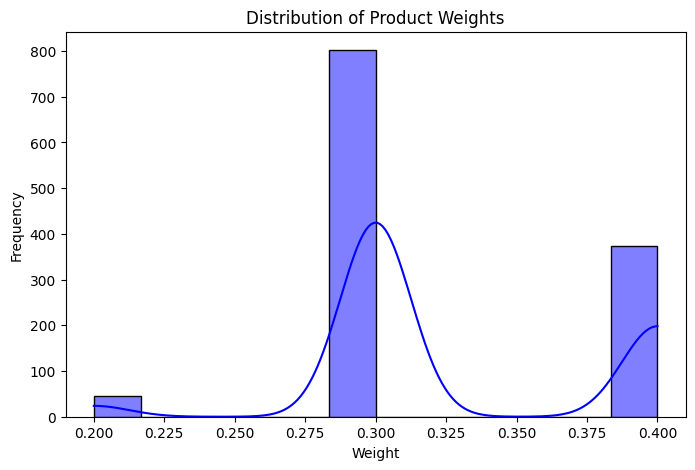

In [57]:
plt.figure(figsize=(8,5))
sns.histplot(df['Product_Weight'], kde=True, color='blue')
plt.title('Distribution of Product Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

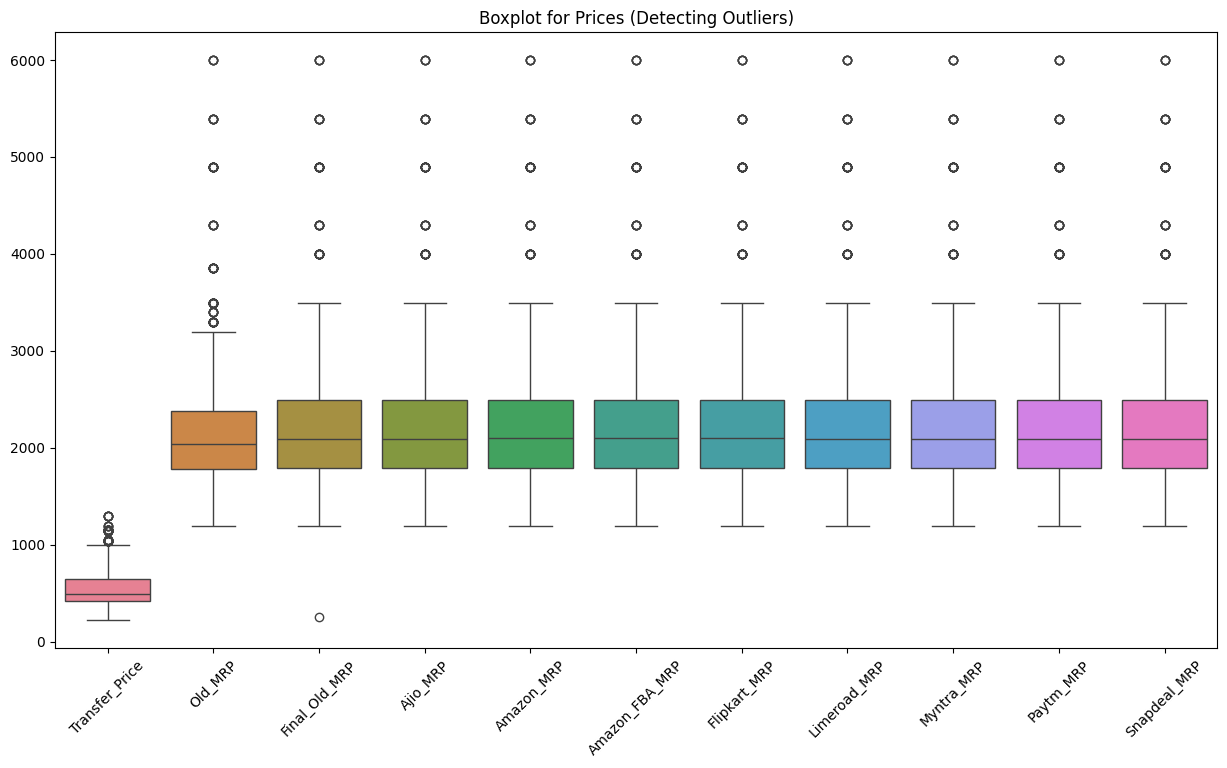

In [58]:
price_cols = ['Transfer_Price', 'Old_MRP', 'Final_Old_MRP', 'Ajio_MRP',
              'Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP',
              'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']

plt.figure(figsize=(15,8))
sns.boxplot(data=df[price_cols])
plt.xticks(rotation=45)
plt.title('Boxplot for Prices (Detecting Outliers)')
plt.show()

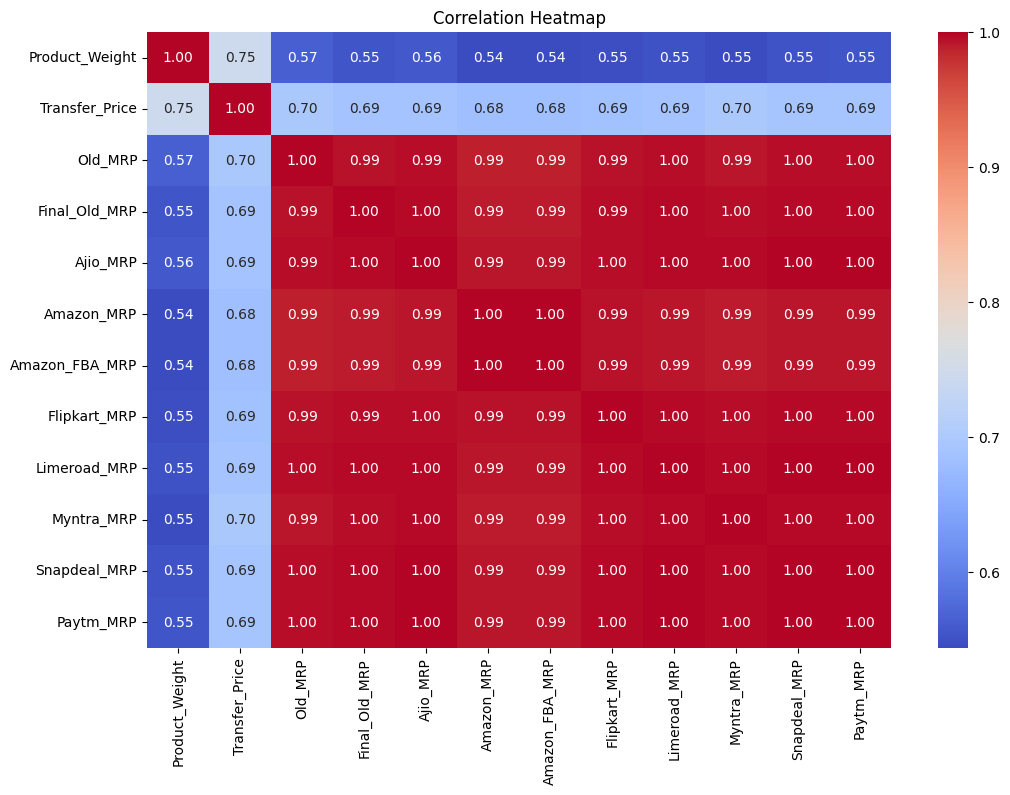

In [59]:
num_columns = ['Product_Weight', 'Transfer_Price', 'Old_MRP',
               'Final_Old_MRP', 'Ajio_MRP', 'Amazon_MRP', 'Amazon_FBA_MRP',
               'Flipkart_MRP', 'Limeroad_MRP', 'Myntra_MRP', 'Snapdeal_MRP',
               'Paytm_MRP']

# Calculate correlation matrix
correlation_matrix = df[num_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\gvars\AppData\Local\Temp\ipykernel_8888\551762010.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_comparison.index, y=price_comparison.values, palette='viridis')


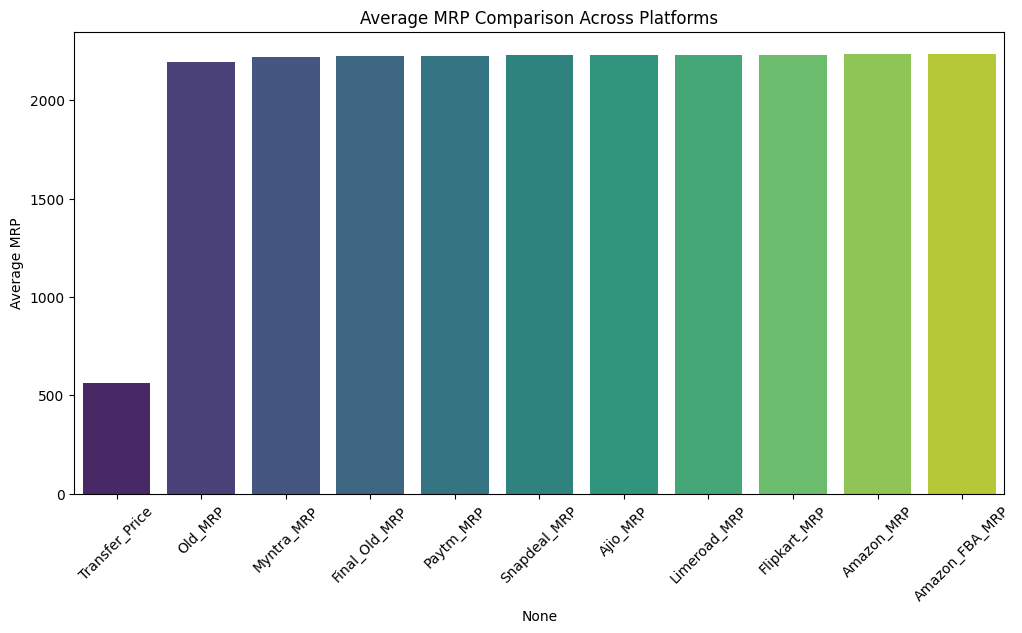

In [60]:
plt.figure(figsize=(12,6))
price_comparison = df[price_cols].mean().sort_values()
sns.barplot(x=price_comparison.index, y=price_comparison.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average MRP Comparison Across Platforms')
plt.ylabel('Average MRP')
plt.show()

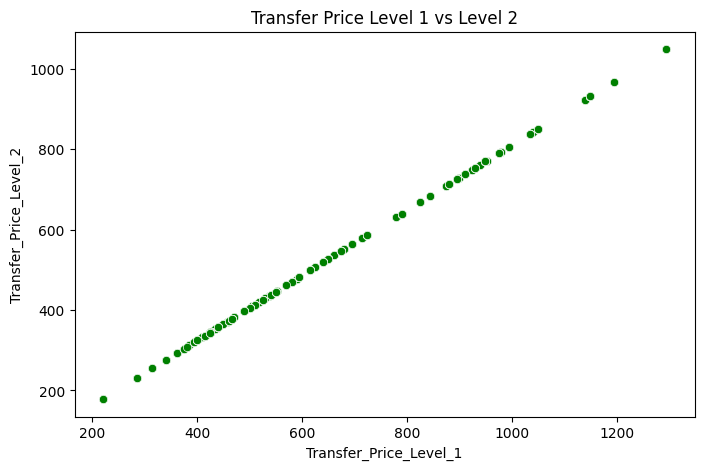

In [61]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Transfer_Price_Level_1', y='Transfer_Price_Level_2', data=df, color='green')
plt.title('Transfer Price Level 1 vs Level 2')
plt.xlabel('Transfer_Price_Level_1')
plt.ylabel('Transfer_Price_Level_2')
plt.show()